In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
from itertools import cycle

from analysis_utils.ClassifierPlots import create_reliability_diagram, create_roc_curve, create_feature_importance_plot
from analysis_utils.Analysis import print_accuracy_and_classification_report, predict_classes, get_somatic_error_type

sns.set_style("white")
sns.set_context('poster')

In [3]:
# Pull in training data
training_data = pd.read_pickle('/home/anepal/data/training_data_preprocessed.pkl')
training_data.sort_index(axis=1, inplace=True)

In [4]:
training_data

,call,disease_AML,disease_GST,disease_MPNST,disease_SCLC,disease_breast,disease_colorectal,disease_glioblastoma,disease_lymphoma,disease_melanoma,...,tumor_var_avg_distance_to_q2_start_in_q2_reads,tumor_var_avg_mapping_quality,tumor_var_avg_num_mismaches_as_fraction,tumor_var_avg_pos_as_fraction,tumor_var_avg_se_mapping_quality,tumor_var_avg_sum_mismatch_qualities,tumor_var_count,tumor_var_num_minus_strand,tumor_var_num_plus_strand,tumor_var_num_q2_containing_reads
fSsFJH1EY3AKAWF2 BER9Q2JBY3EPAWUcZUpOaAZCc0MRSRU=,a,1,0,0,0,0,0,0,0,0,...,0.377551,0.192667,0.057692,0.62,0.140667,0.215676,0.000990,0.001075,0.000806,0.000735
fSsFJH1EY3AKAWF2 BEV9RGJDY3UABGEcYkpMaAJNdkcXSQY=,s,1,0,0,0,0,0,0,0,0,...,0.479592,1.000000,0.019231,0.51,0.614833,0.074597,0.007054,0.006450,0.007258,0.006860
fSsFJH1EY3AKAWF2 BEV9RGJDZ3oMAWMcYkpMbA1Bc0UTSQY=,s,1,0,0,0,0,0,0,0,0,...,0.408163,1.000000,0.019231,0.53,0.616667,0.078946,0.003898,0.004192,0.003226,0.003553
fSsFJH1EY3AKAWF2 BEV9QmFCZXsLA2IcZElNbgxGcUN9SQY=,a,1,0,0,0,0,0,0,0,0,...,0.479592,0.483333,0.346154,0.96,0.483333,0.661405,0.000124,0.000000,0.000269,0.000245
fSsFJH1EY3AKAWF2 BEZ9RmNHanUOA2YBfElLaQ1DcEFnRwZ8eg==,a,1,0,0,0,0,0,0,0,0,...,0.122449,0.270000,0.096154,0.28,0.200000,0.302414,0.001547,0.001397,0.001613,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fSsJJ31OYnIJBWE= bU5zQ2lFYHQODHwFZUFKawNDfjBuIw==,s,0,0,0,1,0,0,0,0,0,...,0.551020,0.987000,0.019231,0.58,0.613333,0.080375,0.002475,0.000537,0.004704,0.004288
fSsJJ31OYnIJBWE= bU5yRGREYHcBAHwEYkxLawBMciNuNA==,s,0,0,0,1,0,0,0,0,0,...,0.408163,0.974500,0.019231,0.55,0.612000,0.079771,0.004455,0.004085,0.004570,0.004533
fSsJJ31OYnIJBWE= bU5yQmFGZHcKDHwEZElJbwBHfiNuNg==,s,0,0,0,1,0,0,0,0,0,...,0.387755,0.984500,0.038462,0.55,0.614333,0.099140,0.003589,0.003977,0.002823,0.003308
fSsJJ31OYnIJBWE= bU5xTmVHY3cMDXwHaE1IaABBfzBuNg==,s,0,0,0,1,0,0,0,0,0,...,0.418367,0.979000,0.019231,0.51,0.614500,0.079308,0.003775,0.003440,0.003898,0.004043


In [5]:
# Remove AML31 case
aml31_training = training_data[training_data.index.str.contains('fSsMNn1DZ3AIDGk=')]
training_data = training_data[~training_data.index.str.contains('fSsMNn1DZ3AIDGk=')]

In [6]:
training_data

,call,disease_AML,disease_GST,disease_MPNST,disease_SCLC,disease_breast,disease_colorectal,disease_glioblastoma,disease_lymphoma,disease_melanoma,...,tumor_var_avg_distance_to_q2_start_in_q2_reads,tumor_var_avg_mapping_quality,tumor_var_avg_num_mismaches_as_fraction,tumor_var_avg_pos_as_fraction,tumor_var_avg_se_mapping_quality,tumor_var_avg_sum_mismatch_qualities,tumor_var_count,tumor_var_num_minus_strand,tumor_var_num_plus_strand,tumor_var_num_q2_containing_reads
fSsFJH1EY3AKAWF2 BER9Q2JBY3EPAWUcZUpOaAZCc0MRSRU=,a,1,0,0,0,0,0,0,0,0,...,0.377551,0.192667,0.057692,0.62,0.140667,0.215676,0.000990,0.001075,0.000806,0.000735
fSsFJH1EY3AKAWF2 BEV9RGJDY3UABGEcYkpMaAJNdkcXSQY=,s,1,0,0,0,0,0,0,0,0,...,0.479592,1.000000,0.019231,0.51,0.614833,0.074597,0.007054,0.006450,0.007258,0.006860
fSsFJH1EY3AKAWF2 BEV9RGJDZ3oMAWMcYkpMbA1Bc0UTSQY=,s,1,0,0,0,0,0,0,0,0,...,0.408163,1.000000,0.019231,0.53,0.616667,0.078946,0.003898,0.004192,0.003226,0.003553
fSsFJH1EY3AKAWF2 BEV9QmFCZXsLA2IcZElNbgxGcUN9SQY=,a,1,0,0,0,0,0,0,0,0,...,0.479592,0.483333,0.346154,0.96,0.483333,0.661405,0.000124,0.000000,0.000269,0.000245
fSsFJH1EY3AKAWF2 BEZ9RmNHanUOA2YBfElLaQ1DcEFnRwZ8eg==,a,1,0,0,0,0,0,0,0,0,...,0.122449,0.270000,0.096154,0.28,0.200000,0.302414,0.001547,0.001397,0.001613,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fSsJJ31OYnIJBWE= bU5zQ2lFYHQODHwFZUFKawNDfjBuIw==,s,0,0,0,1,0,0,0,0,0,...,0.551020,0.987000,0.019231,0.58,0.613333,0.080375,0.002475,0.000537,0.004704,0.004288
fSsJJ31OYnIJBWE= bU5yRGREYHcBAHwEYkxLawBMciNuNA==,s,0,0,0,1,0,0,0,0,0,...,0.408163,0.974500,0.019231,0.55,0.612000,0.079771,0.004455,0.004085,0.004570,0.004533
fSsJJ31OYnIJBWE= bU5yQmFGZHcKDHwEZElJbwBHfiNuNg==,s,0,0,0,1,0,0,0,0,0,...,0.387755,0.984500,0.038462,0.55,0.614333,0.099140,0.003589,0.003977,0.002823,0.003308
fSsJJ31OYnIJBWE= bU5xTmVHY3cMDXwHaE1IaABBfzBuNg==,s,0,0,0,1,0,0,0,0,0,...,0.418367,0.979000,0.019231,0.51,0.614500,0.079308,0.003775,0.003440,0.003898,0.004043


In [7]:
# Show the calls associate with training data
training_data.groupby('call').size()

call
a    10643
f     8854
g     3122
s    18381
dtype: int64

In [8]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Somatic, ambigous, fail classifier

In [9]:
# Re-label the germline calls as failed calls
three_class = training_data.replace('g','f')
three_class.sort_index(axis=1, inplace=True)

In [10]:
# Show the calls associate with training data
three_class.groupby('call').size()

call
a    10643
f    11976
s    18381
dtype: int64

In [11]:
# Get labels for training data
Y = three_class.call.values
# Get training data as numpy array
X = training_data.drop(['call'], axis=1).astype(float).values

In [12]:
Y

array(['a', 's', 's', ..., 's', 's', 'f'], dtype=object)

In [13]:
#preprocessing:
from sklearn.preprocessing import StandardScaler
# Split the data for cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=seed)
#scale the data:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
len(X_train)

27470

In [15]:
len(Y_test)

13530

In [16]:
# Determine shape of training data features for cross-validation
X_train.shape

(27470, 71)

In [17]:
# Determine shape of training data calls for cross-validation
Y_train.shape

(27470,)

In [18]:
# Set parameters for the SVM-lin Model
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
enc = preprocessing.MultiLabelBinarizer()
Y_one_hot = enc.fit_transform(Y_train)
 

In [20]:
#https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
import warnings
warnings.filterwarnings('ignore')
import sklearn.svm as svmlin
# Perform cross validation and pull AUC for various C
auc = []
for n in [0.0005,0.0001, 0.01]: 
    est =  svmlin.SVC(C=n, kernel= "linear",probability=True)
    probs = cross_val_predict(est, X_train, Y_train, cv=kfold, method='predict_proba',n_jobs= -1)
    temp_auc = []
    for j in range(Y_one_hot.shape[1]):
        temp_auc.append(metrics.roc_auc_score(Y_one_hot[:, j], probs[:, j]))
    auc.append(temp_auc)
    print('Test AUC for {0} C: '.format(n), temp_auc)
    print('---------------------------------------------------------')

Test AUC for 0.0005 C:  [0.8713459603792203, 0.9758663954583999, 0.9264053869816284]
---------------------------------------------------------
Test AUC for 0.0001 C:  [0.853608031253255, 0.9695963219823791, 0.914083063520533]
---------------------------------------------------------
Test AUC for 0.01 C:  [0.8923137773511541, 0.9812485424319249, 0.9428951272745556]
---------------------------------------------------------


In [21]:
# Set parameters for the estimator
estimator =  svmlin.SVC(C=0.01, kernel= "linear",probability=True)

In [22]:
# Perform cross validation
probabilities = cross_val_predict(estimator, X_train, Y_train, cv=kfold, method='predict_proba')

In [23]:
probabilities

array([[1.34137561e-01, 2.83653737e-01, 5.82208703e-01],
       [9.67061491e-02, 2.05923220e-01, 6.97370631e-01],
       [2.12060542e-01, 5.38519148e-01, 2.49420309e-01],
       ...,
       [7.38930663e-01, 9.32706255e-03, 2.51742274e-01],
       [3.20905258e-02, 4.48127775e-04, 9.67461346e-01],
       [9.31836306e-01, 7.54448516e-03, 6.06192086e-02]])

In [24]:
# print accuracy report
print_accuracy_and_classification_report(Y_one_hot, predict_classes(probabilities))

Cross validation accuracy:
	 0.8372406261376046

Cross validation classification report

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      7189
           1       0.91      0.87      0.89      8015
           2       0.85      0.89      0.87     12266

   micro avg       0.84      0.84      0.84     27470
   macro avg       0.83      0.82      0.83     27470
weighted avg       0.84      0.84      0.84     27470
 samples avg       0.84      0.84      0.84     27470



In [25]:
# Save the probabilities in /data folder
np.save('/home/anepal/data/svm/1000estimators.npy', probabilities)

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = somatic

In [26]:
# print accuracy report
print_accuracy_and_classification_report(Y_one_hot, predict_classes(probabilities))

Cross validation accuracy:
	 0.8372406261376046

Cross validation classification report

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      7189
           1       0.91      0.87      0.89      8015
           2       0.85      0.89      0.87     12266

   micro avg       0.84      0.84      0.84     27470
   macro avg       0.83      0.82      0.83     27470
weighted avg       0.84      0.84      0.84     27470
 samples avg       0.84      0.84      0.84     27470



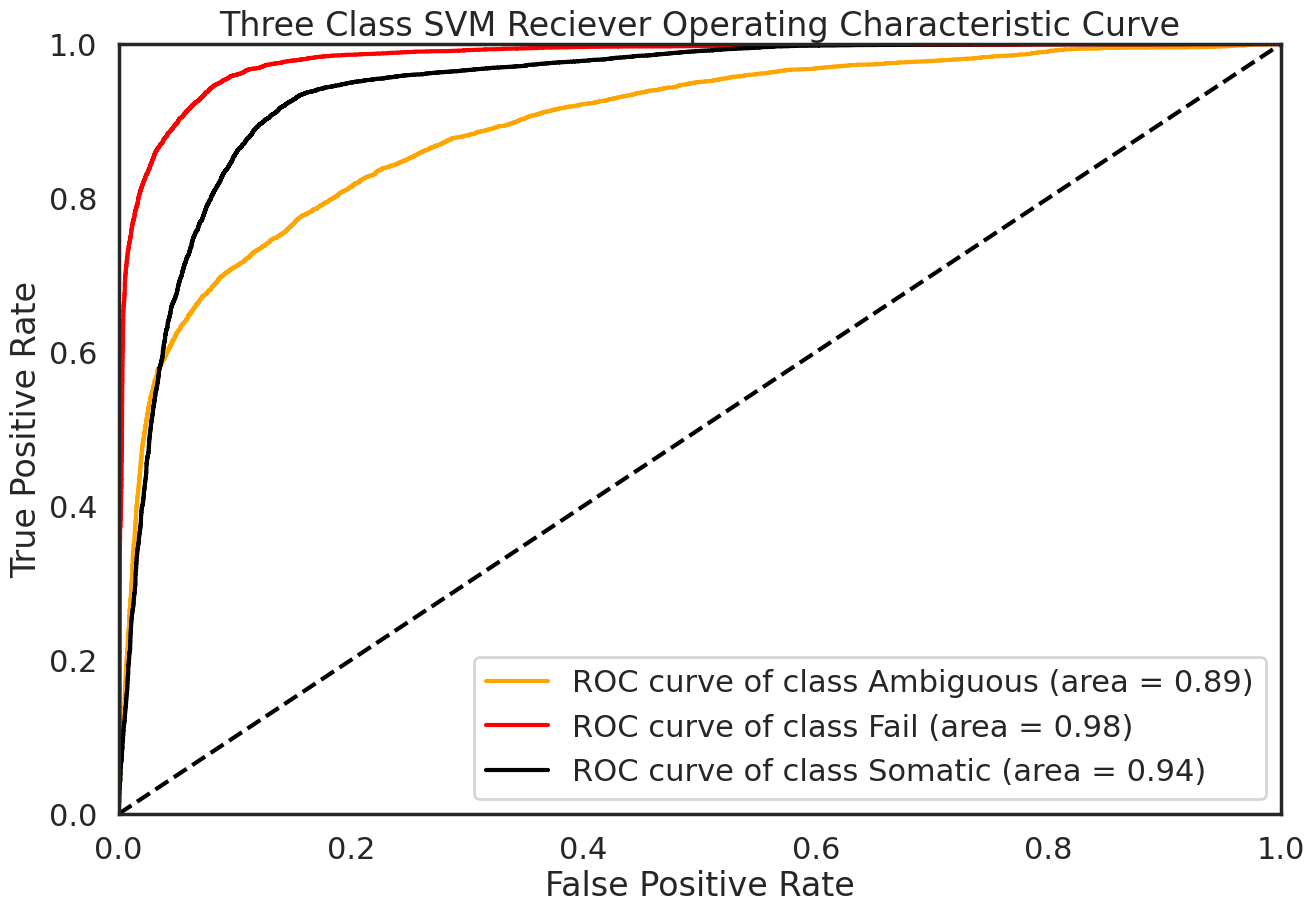

In [ ]:

# Plot ROC for SVM-lin
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fig, ax = plt.subplots()
create_roc_curve(Y_one_hot, probabilities, class_lookup, 'Three Class SVM'
                 ' Reciever Operating Characteristic Curve', ax)


confidence intervals +-:  [0.00075827 0.00368605 0.00525563 0.0079833  0.00988378 0.00990183
 0.00816023 0.00543684 0.00425182 0.00181173]


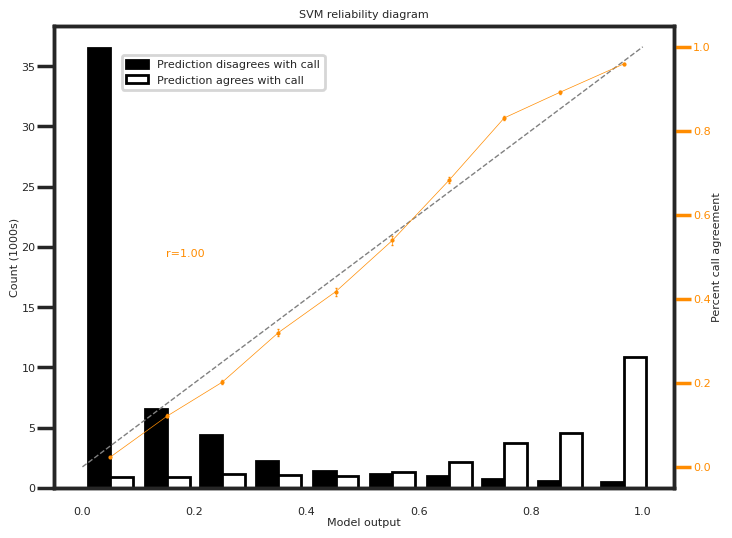

In [28]:
# Plot reliability diagram for SVM-lin
fig.tight_layout()
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
lgd = create_reliability_diagram(probabilities, Y_one_hot,['Ambiguous','Fail','Somatic'], 'darkorange', 'SVM reliability diagram',
                                 ax, True, True, True)
lgd.set_bbox_to_anchor((0.1, .85))

## Feature importance analysis

In [29]:
# Rebuild SVM-lin
svmm = estimator.fit(X_train, Y_train)

In [30]:
# Sum the feature importance metrics for one-hot encoded variables
# (Feature importance calculation in scikit-learn is outlined 
# here https://stackoverflow.com/a/15821880/3862525).
# Since the importances are calculated with the same denominator, summing is
# appropriate
def sum_features(feature_import, label):
    starts_with_label = feature_import.feature.str.startswith(label)
    return feature_import.importance[starts_with_label].sum()

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Create function to determine the feature importance 
def create_feature_importance_plot(trained_model,training_data, save_fp='/home/anepal/data/svm/feature_import.pkl'):
    feature_import = pd.DataFrame([training_data.drop(['call'], axis=1).columns.values,trained_model.coef_[0]]).T
    feature_import.columns = ['feature', 'importance']
    summed_importances = []
    for label in ['disease', 'reviewer']:
        summed_importances.append([label, sum_features(feature_import, label)])
    summed_importances = pd.DataFrame(summed_importances, columns=['feature','importance'])
    feature_import.sort_values('importance', ascending=False, inplace=True)
    feature_import.replace({'feature':{'var':'variant','ref':'reference', 'avg':'average', '_se_':'_single_end_', '3p':'3_prime', '_':' '}}, regex=True, inplace=True)
    feature_import.to_pickle(save_fp)
    sns.barplot(y='feature', x='importance', data=feature_import.head(30), color='darkorange')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('SVM feature importance')

In [32]:
svmm

SVC(C=0.01, kernel='linear', probability=True)

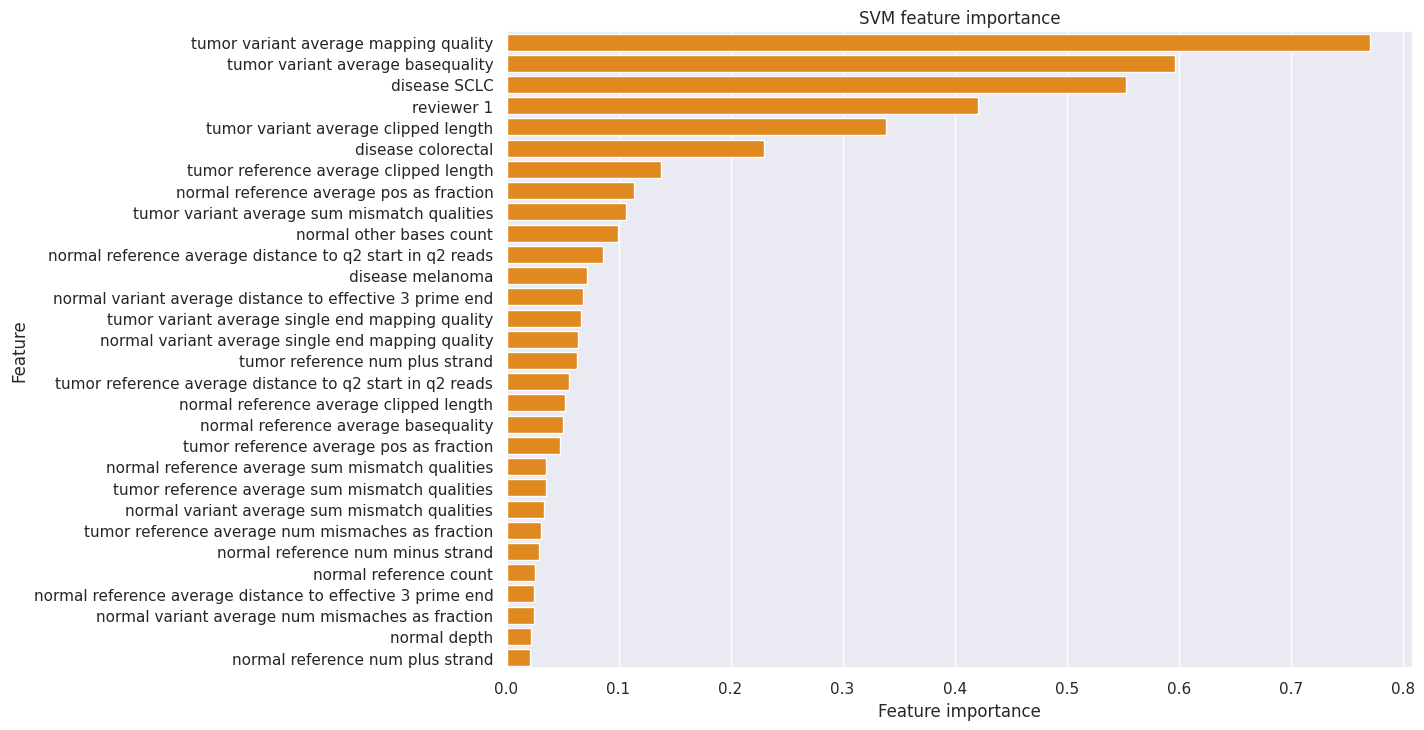

In [33]:
# Plot feature importance graph
create_feature_importance_plot(svmm,training_data)

### Test set performance

In [34]:
# Determine performance on test set
test_prob = svmm.predict_proba(X_test)

In [35]:
# Transform labels for predictions
Y_test_labels = enc.fit_transform(Y_test)

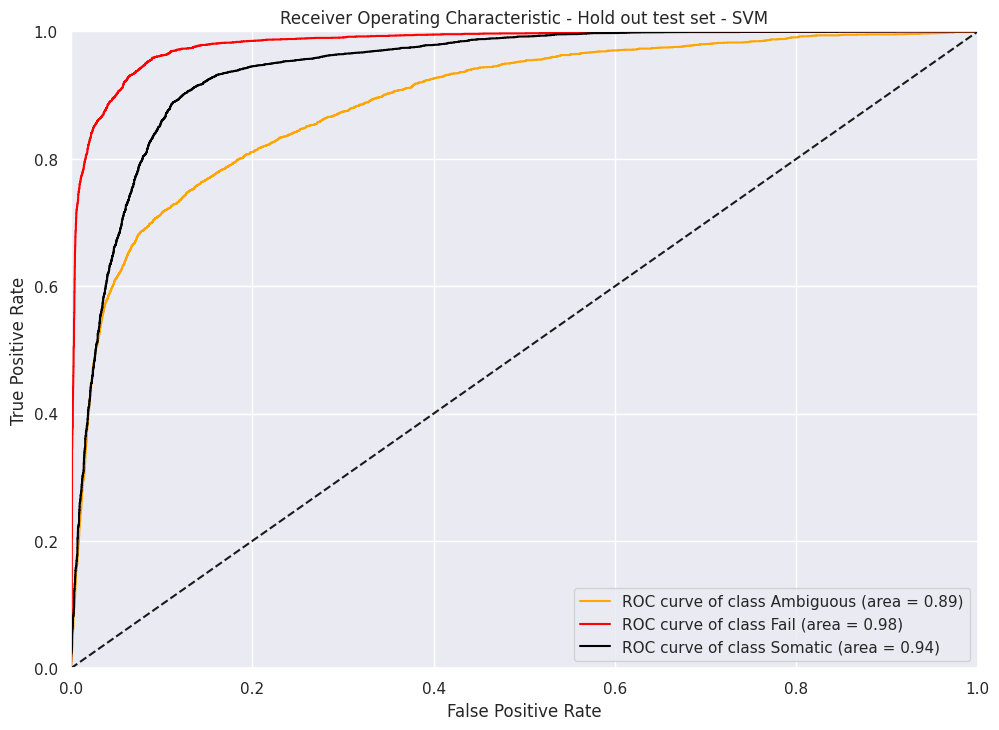

In [36]:
# Plot AUC for test set
fig, ax = plt.subplots()
create_roc_curve(Y_test_labels, test_prob, class_lookup, 'Receiver Operating '
                 'Characteristic - Hold out test set - '
                 'SVM', ax)

confidence intervals +-:  [0.00104619 0.00553032 0.00772266 0.01120086 0.01429661 0.01409647
 0.01148137 0.00818347 0.00629306 0.00249679]


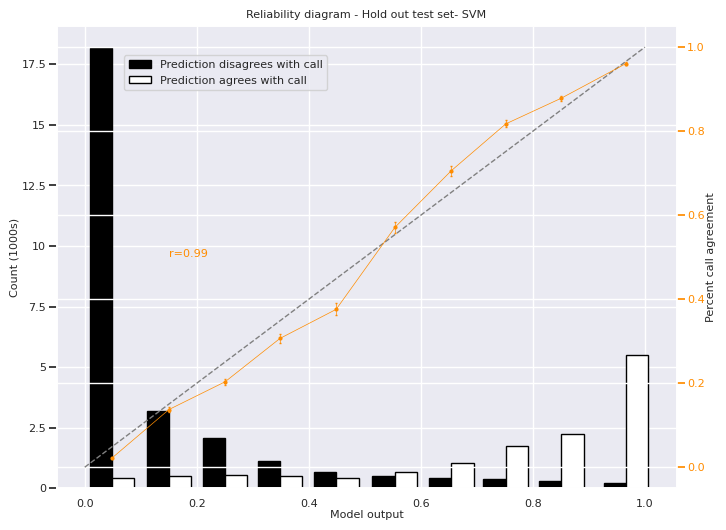

In [37]:
# Plot reliability diagram for test set
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
lgd = create_reliability_diagram(test_prob, Y_test_labels,
                                 ['Ambiguous','Fail','Somatic'], 
                                 'darkorange', 'Reliability diagram - Hold out test set'
                                 '- SVM',
                                 ax, True, True, True)
lgd.set_bbox_to_anchor((0.1, .85))